In [1]:
### NLP - SentimentAnalysis ###
## Tuan Linh Dao - L3IA ##

In [5]:
pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org spacy


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org nltk

     - 2.8 kB ? 0:00:00
     - 40.9 kB 49.4 MB/s 0:00:00
   | 1.5 MB 8.6 MB/s 0:00:000mm
   - 296.7 kB 41.2 MB/s 0:00:00

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
import xml.etree.ElementTree as ET
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tag import pos_tag
import spacy

In [9]:
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('sentiwordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tuanlinhdao/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/tuanlinhdao/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/tuanlinhdao/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to
[nltk_data]     /Users/tuanlinhdao/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tuanlinhdao/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/tuanlinhdao/nltk_data...
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /Users/tuanlinhdao/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


True

In [19]:
!pip uninstall -y spacy

Found existing installation: spacy 3.7.4
Uninstalling spacy-3.7.4:
  Successfully uninstalled spacy-3.7.4


In [20]:
pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org spacy==3.2.0

     - 17.7 kB 45.8 MB/s 0:00:00
     - 14.8 kB 37.9 MB/s 0:00:00
     - 28.3 kB 51.8 MB/s 0:00:00
     - 12.1 kB 17.1 MB/s 0:00:00
     - 16.1 kB 51.3 MB/s 0:00:00
     - 103.1 kB 65.5 MB/s 0:00:00
     - 18.1 kB 33.1 MB/s 0:00:00
   | 6.3 MB 7.5 MB/s 0:00:00mmm
   - 47.3 kB 117.1 MB/s 0:00:00
   - 23.8 kB 69.7 MB/s 0:00:00
   - 126.0 kB 5.4 MB/s 0:00:00
   - 648.7 kB 68.3 MB/s 0:00:00
   - 28.0 kB 49.3 MB/s 0:00:00
   - 26.1 kB 26.9 MB/s 0:00:00
  Attempting uninstall: wasabi
    Found existing installation: wasabi 1.1.2
    Uninstalling wasabi-1.1.2:
      Successfully uninstalled wasabi-1.1.2
  Attempting uninstall: typer
    Found existing installation: typer 0.9.4
    Uninstalling typer-0.9.4:
      Successfully uninstalled typer-0.9.4
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.6.3
    Uninstalling pydantic-2.6.3:
      Successfully uninstalled pydantic-2.6.3
  Attempting uninstall: thinc
    Found existing installation: thinc 8.2.3
    Uninstall

In [21]:
pip install en_core_web_sm-3.2.0.tar.gz

Processing ./en_core_web_sm-3.2.0.tar.gz
  Preparing metadata (setup.py) ... done
  Created wheel for en_core_web_sm: filename=en_core_web_sm-3.2.0-py3-none-any.whl size=13900195 sha256=5320d624946bbd1519f461b336d7abc5a1492c9ba9d2e2e51546a934c676bf76
  Stored in directory: /Users/tuanlinhdao/Library/Caches/pip/wheels/79/fb/24/55b7d3479b4161bb0a20bdff4005e3b4d8b44512a84fcdf3db
Successfully built en_core_web_sm

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [22]:
import pandas as pd
import spacy
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn

In [7]:
###################################

In [23]:
                                            ##############################
                                            ### Données d'entrainement ###
                                            ##############################

def preprocess_train_file(filename):
    # Parse the XML file
    tree = ET.parse(filename)
    root = tree.getroot()

    # Initialize a list to store the preprocessed data
    preprocessed_train = []

    # Loop through each sentence in the XML file
    for sentence in root.iter('sentence'):
        # Extract the sentence text
        text = sentence.find('text').text

        # Extract the aspect terms, if any
        aspect_terms = sentence.find('aspectTerms')

        # Extract the aspect categories, if any
        aspect_categories = sentence.find('aspectCategories')

        if aspect_terms is None and aspect_categories is None:
            # If there are no aspect terms or aspect categories, append the sentence with no term and polarity
            preprocessed_train.append({
                'id': sentence.get('id'),
                'term': '',
                'phrase': text,
                'from': '',
                'to': '',
                'polarity': ''
            })
        elif aspect_terms is not None:
            # If there are aspect terms, extract their polarities and combine them with aspect categories' polarities
            term_polarity_pairs = []
            for aspect_term in aspect_terms.iter('aspectTerm'):
                term = aspect_term.get('term')
                polarity = aspect_term.get('polarity')
                from_pos = aspect_term.get('from')
                to_pos = aspect_term.get('to')
                term_polarity_pairs.append((term, polarity, from_pos, to_pos))
            if aspect_categories is not None:
                for aspect_category in aspect_categories.iter('aspectCategory'):
                    term_polarity_pairs.append((aspect_category.get('category'), aspect_category.get('polarity'), '', ''))
            for term_polarity_pair in term_polarity_pairs:
                term = term_polarity_pair[0]
                polarity = term_polarity_pair[1]
                from_pos = term_polarity_pair[2]
                to_pos = term_polarity_pair[3]
                preprocessed_train.append({
                    'id': sentence.get('id'),
                    'term': term,
                    'phrase': text,
                    'from': from_pos,
                    'to': to_pos,
                    'polarity': polarity
                })
        else:
            # If there are no aspect terms but there are aspect categories, extract their polarities
            for aspect_category in aspect_categories.iter('aspectCategory'):
                term = aspect_category.get('category')
                polarity = aspect_category.get('polarity')
                preprocessed_train.append({
                    'id': sentence.get('id'),
                    'term': term,
                    'phrase': text,
                    'from': '',
                    'to': '',
                    'polarity': polarity
                })

    # Convert the list of preprocessed data to a Pandas DataFrame and return it
    return pd.DataFrame(preprocessed_train)

train_data = preprocess_train_file("Restaurants_Train.xml")
train_data.head(5)

,id,term,phrase,from,to,polarity
0,3121,staff,But the staff was so horrible to us.,8,13,negative
1,3121,service,But the staff was so horrible to us.,,,negative
2,2777,food,"To be completely fair, the only redeeming fact...",57,61,positive
3,2777,food,"To be completely fair, the only redeeming fact...",,,positive
4,2777,anecdotes/miscellaneous,"To be completely fair, the only redeeming fact...",,,negative


In [10]:
                                            ##############################
                                            ###### Données de test #######
                                            ##############################

In [24]:
def preprocess_test_file(filename):
    # Parse the XML file
    tree = ET.parse(filename)
    root = tree.getroot()

    # Initialize a list to store the preprocessed data
    preprocessed_test = []

    # Loop through each sentence in the XML file
    for sentence in root.iter('sentence'):
        # Extract the sentence text
        text = sentence.find('text').text

        # Extract the aspect terms, if any
        aspect_terms = sentence.find('aspectTerms')

        # Extract the aspect categories, if any
        aspect_categories = sentence.find('aspectCategories')

        if aspect_terms is None and aspect_categories is None:
            # If there are no aspect terms or aspect categories, append the sentence with no term and polarity
            preprocessed_test.append({
                'id': sentence.get('id'),
                'term': '',
                'phrase': text,
                'from': '',
                'to': '',
                'polarity': ''
            })
        elif aspect_terms is not None:
            # If there are aspect terms, extract their polarities and combine them with aspect categories' polarities
            term_polarity_pairs = []
            for aspect_term in aspect_terms.iter('aspectTerm'):
                term = aspect_term.get('term')
                polarity = aspect_term.get('polarity')
                from_pos = aspect_term.get('from')
                to_pos = aspect_term.get('to')
                term_polarity_pairs.append((term, polarity, from_pos, to_pos))
            if aspect_categories is not None:
                for aspect_category in aspect_categories.iter('aspectCategory'):
                    term_polarity_pairs.append((aspect_category.get('category'), aspect_category.get('polarity'), '', ''))
            for term_polarity_pair in term_polarity_pairs:
                term = term_polarity_pair[0]
                polarity = term_polarity_pair[1]
                from_pos = term_polarity_pair[2]
                to_pos = term_polarity_pair[3]
                preprocessed_test.append({
                    'id': sentence.get('id'),
                    'term': term,
                    'phrase': text,
                    'from': from_pos,
                    'to': to_pos,
                    'polarity': polarity
                })
        else:
            # If there are no aspect terms but there are aspect categories, extract their polarities
            for aspect_category in aspect_categories.iter('aspectCategory'):
                term = aspect_category.get('category')
                polarity = aspect_category.get('polarity')
                preprocessed_test.append({
                    'id': sentence.get('id'),
                    'term': term,
                    'phrase': text,
                    'from': '',
                    'to': '',
                    'polarity': polarity
                })

    # Convert the list of preprocessed data to a Pandas DataFrame and return it
    return pd.DataFrame(preprocessed_test)

test_data = preprocess_test_file("Restaurants_Test_Gold.xml")
test_data.head(20)

,id,term,phrase,from,to,polarity
0,813,appetizers,"All the appetizers and salads were fabulous, t...",8,18,positive
1,813,salads,"All the appetizers and salads were fabulous, t...",23,29,positive
2,813,steak,"All the appetizers and salads were fabulous, t...",49,54,positive
3,813,pasta,"All the appetizers and salads were fabulous, t...",82,87,positive
4,813,food,"All the appetizers and salads were fabulous, t...",,,positive
5,1579,portions,And really large portions.,17,25,positive
6,1579,food,And really large portions.,,,positive
7,2707,anecdotes/miscellaneous,Go inside and you won't want to leave.,,,positive
8,3126,anecdotes/miscellaneous,Save yourself the time and trouble and skip th...,,,negative
9,2882,sweet lassi,The sweet lassi was excellent as was the lamb ...,4,15,positive


In [12]:
####################
### Tokenization ###
####################

In [25]:
### Tokenization de donnés d'entrainement ###
train_data['tokenized_train'] = train_data['phrase'].apply(nltk.word_tokenize)
train_data

,id,term,phrase,from,to,polarity,tokenized_train
0,3121,staff,But the staff was so horrible to us.,8,13,negative,"[But, the, staff, was, so, horrible, to, us, .]"
1,3121,service,But the staff was so horrible to us.,,,negative,"[But, the, staff, was, so, horrible, to, us, .]"
2,2777,food,"To be completely fair, the only redeeming fact...",57,61,positive,"[To, be, completely, fair, ,, the, only, redee..."
3,2777,food,"To be completely fair, the only redeeming fact...",,,positive,"[To, be, completely, fair, ,, the, only, redee..."
4,2777,anecdotes/miscellaneous,"To be completely fair, the only redeeming fact...",,,negative,"[To, be, completely, fair, ,, the, only, redee..."
...,...,...,...,...,...,...,...
7401,671,vegetables,Each table has a pot of boiling water sunken i...,114,124,neutral,"[Each, table, has, a, pot, of, boiling, water,..."
7402,671,rice,Each table has a pot of boiling water sunken i...,130,134,neutral,"[Each, table, has, a, pot, of, boiling, water,..."
7403,671,glass noodles,Each table has a pot of boiling water sunken i...,139,152,neutral,"[Each, table, has, a, pot, of, boiling, water,..."
7404,671,food,Each table has a pot of boiling water sunken i...,,,neutral,"[Each, table, has, a, pot, of, boiling, water,..."


In [26]:
### Tokenization de donnés de test ###
test_data['tokenized_test']=test_data['phrase'].apply(nltk.word_tokenize)
test_data

,id,term,phrase,from,to,polarity,tokenized_test
0,813,appetizers,"All the appetizers and salads were fabulous, t...",8,18,positive,"[All, the, appetizers, and, salads, were, fabu..."
1,813,salads,"All the appetizers and salads were fabulous, t...",23,29,positive,"[All, the, appetizers, and, salads, were, fabu..."
2,813,steak,"All the appetizers and salads were fabulous, t...",49,54,positive,"[All, the, appetizers, and, salads, were, fabu..."
3,813,pasta,"All the appetizers and salads were fabulous, t...",82,87,positive,"[All, the, appetizers, and, salads, were, fabu..."
4,813,food,"All the appetizers and salads were fabulous, t...",,,positive,"[All, the, appetizers, and, salads, were, fabu..."
...,...,...,...,...,...,...,...
205,2912,food,"The dishes offered were unique, very tasty and...",,,positive,"[The, dishes, offered, were, unique, ,, very, ..."
206,3188,office lunch,Went there for an office lunch.,18,30,neutral,"[Went, there, for, an, office, lunch, .]"
207,3188,anecdotes/miscellaneous,Went there for an office lunch.,,,neutral,"[Went, there, for, an, office, lunch, .]"
208,3041,dinner,"We've only eaten in the restaurant once, but w...",76,82,neutral,"[We, 've, only, eaten, in, the, restaurant, on..."


In [15]:
###############################

In [27]:
### Extraire POS du train_data pour toutes les phrases ###
nlp = spacy.load('en_core_web_sm')
get_pos = lambda text: [token.pos_ for token in nlp(text)]
train_data["pos_tags"] = train_data["phrase"].apply(get_pos)
train_data.head(5)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/spacy/util.py:910: UserWarning: [W095] Model 'en_core_web_sm' (3.2.0) was trained with spaCy v3.2.0 and may not be 100% compatible with the current version (3.7.4). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  so we're using a workaround here.


,id,term,phrase,from,to,polarity,tokenized_train,pos_tags
0,3121,staff,But the staff was so horrible to us.,8,13,negative,"[But, the, staff, was, so, horrible, to, us, .]","[CCONJ, DET, NOUN, AUX, ADV, ADJ, ADP, PRON, P..."
1,3121,service,But the staff was so horrible to us.,,,negative,"[But, the, staff, was, so, horrible, to, us, .]","[CCONJ, DET, NOUN, AUX, ADV, ADJ, ADP, PRON, P..."
2,2777,food,"To be completely fair, the only redeeming fact...",57,61,positive,"[To, be, completely, fair, ,, the, only, redee...","[PART, AUX, ADV, ADJ, PUNCT, DET, ADJ, VERB, N..."
3,2777,food,"To be completely fair, the only redeeming fact...",,,positive,"[To, be, completely, fair, ,, the, only, redee...","[PART, AUX, ADV, ADJ, PUNCT, DET, ADJ, VERB, N..."
4,2777,anecdotes/miscellaneous,"To be completely fair, the only redeeming fact...",,,negative,"[To, be, completely, fair, ,, the, only, redee...","[PART, AUX, ADV, ADJ, PUNCT, DET, ADJ, VERB, N..."


In [28]:
### Extraire POS du test_data pour toutes les phrases ###
get_pos = lambda text: [token.pos_ for token in nlp(text)]
test_data["pos_tags"] = train_data["phrase"].apply(get_pos)
test_data.head(5)

,id,term,phrase,from,to,polarity,tokenized_test,pos_tags
0,813,appetizers,"All the appetizers and salads were fabulous, t...",8,18,positive,"[All, the, appetizers, and, salads, were, fabu...","[CCONJ, DET, NOUN, AUX, ADV, ADJ, ADP, PRON, P..."
1,813,salads,"All the appetizers and salads were fabulous, t...",23,29,positive,"[All, the, appetizers, and, salads, were, fabu...","[CCONJ, DET, NOUN, AUX, ADV, ADJ, ADP, PRON, P..."
2,813,steak,"All the appetizers and salads were fabulous, t...",49,54,positive,"[All, the, appetizers, and, salads, were, fabu...","[PART, AUX, ADV, ADJ, PUNCT, DET, ADJ, VERB, N..."
3,813,pasta,"All the appetizers and salads were fabulous, t...",82,87,positive,"[All, the, appetizers, and, salads, were, fabu...","[PART, AUX, ADV, ADJ, PUNCT, DET, ADJ, VERB, N..."
4,813,food,"All the appetizers and salads were fabulous, t...",,,positive,"[All, the, appetizers, and, salads, were, fabu...","[PART, AUX, ADV, ADJ, PUNCT, DET, ADJ, VERB, N..."


In [29]:
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
import nltk.sentiment.util as swn_util

def penn_to_wn(tag):
    """Convertion des tags en simple WORDNET TAGS"""
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None

lemmatizer = WordNetLemmatizer()

def get_sentiment(word, tag):
    """
    Return une liste de score positif negatif ou neutre et return une liste vide si le mot ne renvoie rien depuis senti wordnet.
    """
    wn_tag = penn_to_wn(tag)
    if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
        return []
        
    lemma = lemmatizer.lemmatize(word, pos=wn_tag)
    if not lemma:
        return []
    
    synsets = wn.synsets(word, pos=wn_tag)
    if not synsets:
        return []
    # Prend le premier sens du mot c'est à dire le sens le plus commun
    synset = synsets[0]
    swn_synset = swn.senti_synset(synset.name())
    return [swn_synset.pos_score(), swn_synset.neg_score(), swn_synset.obj_score()]

In [30]:
### Extraire les valeurs de sentiment des mots du train_data ###
train_data['score_by_word'] = train_data['phrase'].apply(lambda x: [get_sentiment(token.text, token.pos_) for token in nlp(x)])
train_data['Sentiword'] = train_data['phrase'].apply(lambda x: [word.lower() for word in nltk.word_tokenize(x) if word not in stopwords.words('english')])
train_data.head(5)

,id,term,phrase,from,to,polarity,tokenized_train,pos_tags,score_by_word,Sentiword
0,3121,staff,But the staff was so horrible to us.,8,13,negative,"[But, the, staff, was, so, horrible, to, us, .]","[CCONJ, DET, NOUN, AUX, ADV, ADJ, ADP, PRON, P...","[[], [], [0.0, 0.0, 1.0], [], [], [], [], [], []]","[but, staff, horrible, us, .]"
1,3121,service,But the staff was so horrible to us.,,,negative,"[But, the, staff, was, so, horrible, to, us, .]","[CCONJ, DET, NOUN, AUX, ADV, ADJ, ADP, PRON, P...","[[], [], [0.0, 0.0, 1.0], [], [], [], [], [], []]","[but, staff, horrible, us, .]"
2,2777,food,"To be completely fair, the only redeeming fact...",57,61,positive,"[To, be, completely, fair, ,, the, only, redee...","[PART, AUX, ADV, ADJ, PUNCT, DET, ADJ, VERB, N...","[[], [], [], [], [], [], [], [], [0.0, 0.0, 1....","[to, completely, fair, ,, redeeming, factor, f..."
3,2777,food,"To be completely fair, the only redeeming fact...",,,positive,"[To, be, completely, fair, ,, the, only, redee...","[PART, AUX, ADV, ADJ, PUNCT, DET, ADJ, VERB, N...","[[], [], [], [], [], [], [], [], [0.0, 0.0, 1....","[to, completely, fair, ,, redeeming, factor, f..."
4,2777,anecdotes/miscellaneous,"To be completely fair, the only redeeming fact...",,,negative,"[To, be, completely, fair, ,, the, only, redee...","[PART, AUX, ADV, ADJ, PUNCT, DET, ADJ, VERB, N...","[[], [], [], [], [], [], [], [], [0.0, 0.0, 1....","[to, completely, fair, ,, redeeming, factor, f..."


In [31]:
### Extraire les valeurs de sentiment des mots du test_data ###
test_data['score_by_word'] = test_data['phrase'].apply(lambda x: [get_sentiment(token.text, token.pos_) for token in nlp(x)])
test_data['Sentiword'] = test_data['phrase'].apply(lambda x: [word.lower() for word in nltk.word_tokenize(x) if word not in stopwords.words('english')])
test_data.head(5)

,id,term,phrase,from,to,polarity,tokenized_test,pos_tags,score_by_word,Sentiword
0,813,appetizers,"All the appetizers and salads were fabulous, t...",8,18,positive,"[All, the, appetizers, and, salads, were, fabu...","[CCONJ, DET, NOUN, AUX, ADV, ADJ, ADP, PRON, P...","[[], [], [0.0, 0.0, 1.0], [], [0.0, 0.0, 1.0],...","[all, appetizers, salads, fabulous, ,, steak, ..."
1,813,salads,"All the appetizers and salads were fabulous, t...",23,29,positive,"[All, the, appetizers, and, salads, were, fabu...","[CCONJ, DET, NOUN, AUX, ADV, ADJ, ADP, PRON, P...","[[], [], [0.0, 0.0, 1.0], [], [0.0, 0.0, 1.0],...","[all, appetizers, salads, fabulous, ,, steak, ..."
2,813,steak,"All the appetizers and salads were fabulous, t...",49,54,positive,"[All, the, appetizers, and, salads, were, fabu...","[PART, AUX, ADV, ADJ, PUNCT, DET, ADJ, VERB, N...","[[], [], [0.0, 0.0, 1.0], [], [0.0, 0.0, 1.0],...","[all, appetizers, salads, fabulous, ,, steak, ..."
3,813,pasta,"All the appetizers and salads were fabulous, t...",82,87,positive,"[All, the, appetizers, and, salads, were, fabu...","[PART, AUX, ADV, ADJ, PUNCT, DET, ADJ, VERB, N...","[[], [], [0.0, 0.0, 1.0], [], [0.0, 0.0, 1.0],...","[all, appetizers, salads, fabulous, ,, steak, ..."
4,813,food,"All the appetizers and salads were fabulous, t...",,,positive,"[All, the, appetizers, and, salads, were, fabu...","[PART, AUX, ADV, ADJ, PUNCT, DET, ADJ, VERB, N...","[[], [], [0.0, 0.0, 1.0], [], [0.0, 0.0, 1.0],...","[all, appetizers, salads, fabulous, ,, steak, ..."


In [ ]:
###########################
### Données prétraitées ###
###########################

In [32]:
## Données d'entrainement ##
df_train_resto = train_data[['term','phrase','pos_tags','Sentiword','score_by_word','polarity','tokenized_train']]
df_train_resto.head(5)
#print(df_train_resto.shape) ## La taille de train_data

,term,phrase,pos_tags,Sentiword,score_by_word,polarity,tokenized_train
0,staff,But the staff was so horrible to us.,"[CCONJ, DET, NOUN, AUX, ADV, ADJ, ADP, PRON, P...","[but, staff, horrible, us, .]","[[], [], [0.0, 0.0, 1.0], [], [], [], [], [], []]",negative,"[But, the, staff, was, so, horrible, to, us, .]"
1,service,But the staff was so horrible to us.,"[CCONJ, DET, NOUN, AUX, ADV, ADJ, ADP, PRON, P...","[but, staff, horrible, us, .]","[[], [], [0.0, 0.0, 1.0], [], [], [], [], [], []]",negative,"[But, the, staff, was, so, horrible, to, us, .]"
2,food,"To be completely fair, the only redeeming fact...","[PART, AUX, ADV, ADJ, PUNCT, DET, ADJ, VERB, N...","[to, completely, fair, ,, redeeming, factor, f...","[[], [], [], [], [], [], [], [], [0.0, 0.0, 1....",positive,"[To, be, completely, fair, ,, the, only, redee..."
3,food,"To be completely fair, the only redeeming fact...","[PART, AUX, ADV, ADJ, PUNCT, DET, ADJ, VERB, N...","[to, completely, fair, ,, redeeming, factor, f...","[[], [], [], [], [], [], [], [], [0.0, 0.0, 1....",positive,"[To, be, completely, fair, ,, the, only, redee..."
4,anecdotes/miscellaneous,"To be completely fair, the only redeeming fact...","[PART, AUX, ADV, ADJ, PUNCT, DET, ADJ, VERB, N...","[to, completely, fair, ,, redeeming, factor, f...","[[], [], [], [], [], [], [], [], [0.0, 0.0, 1....",negative,"[To, be, completely, fair, ,, the, only, redee..."


In [33]:
## Données de test ##
df_test_resto = test_data[['term','phrase','pos_tags','Sentiword','score_by_word','polarity','tokenized_test']]
df_test_resto.head(5)
#print(df_test_resto.shape) ## La taille de test_data

,term,phrase,pos_tags,Sentiword,score_by_word,polarity,tokenized_test
0,appetizers,"All the appetizers and salads were fabulous, t...","[CCONJ, DET, NOUN, AUX, ADV, ADJ, ADP, PRON, P...","[all, appetizers, salads, fabulous, ,, steak, ...","[[], [], [0.0, 0.0, 1.0], [], [0.0, 0.0, 1.0],...",positive,"[All, the, appetizers, and, salads, were, fabu..."
1,salads,"All the appetizers and salads were fabulous, t...","[CCONJ, DET, NOUN, AUX, ADV, ADJ, ADP, PRON, P...","[all, appetizers, salads, fabulous, ,, steak, ...","[[], [], [0.0, 0.0, 1.0], [], [0.0, 0.0, 1.0],...",positive,"[All, the, appetizers, and, salads, were, fabu..."
2,steak,"All the appetizers and salads were fabulous, t...","[PART, AUX, ADV, ADJ, PUNCT, DET, ADJ, VERB, N...","[all, appetizers, salads, fabulous, ,, steak, ...","[[], [], [0.0, 0.0, 1.0], [], [0.0, 0.0, 1.0],...",positive,"[All, the, appetizers, and, salads, were, fabu..."
3,pasta,"All the appetizers and salads were fabulous, t...","[PART, AUX, ADV, ADJ, PUNCT, DET, ADJ, VERB, N...","[all, appetizers, salads, fabulous, ,, steak, ...","[[], [], [0.0, 0.0, 1.0], [], [0.0, 0.0, 1.0],...",positive,"[All, the, appetizers, and, salads, were, fabu..."
4,food,"All the appetizers and salads were fabulous, t...","[PART, AUX, ADV, ADJ, PUNCT, DET, ADJ, VERB, N...","[all, appetizers, salads, fabulous, ,, steak, ...","[[], [], [0.0, 0.0, 1.0], [], [0.0, 0.0, 1.0],...",positive,"[All, the, appetizers, and, salads, were, fabu..."


In [34]:
## Sauvegarder train_data et test_data pour les utiliser pour la suite facilement
df_train_resto.to_csv('df_train_resto.csv', index=False)
df_test_resto.to_csv('df_test_resto.csv', index=False)

In [ ]:
##############################

In [ ]:
##################
### Graphiques ###
##################

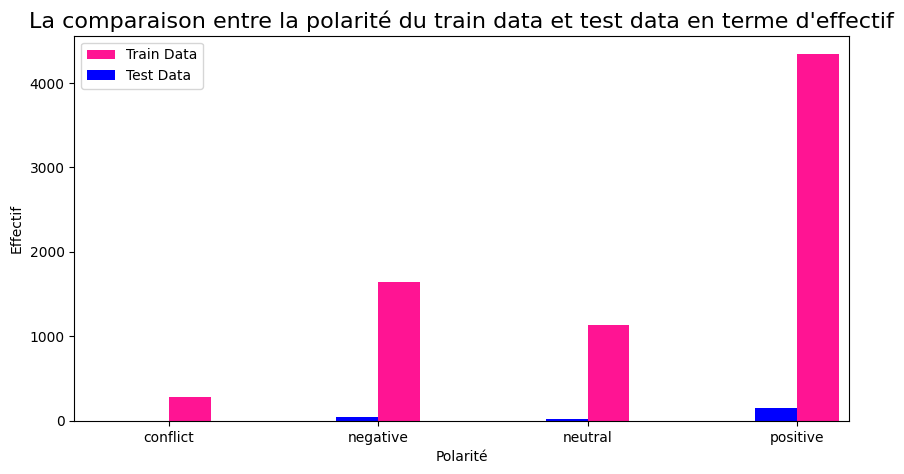

In [35]:
## Comparaison entre la polarité de données d'entrainement et celle de données de test en terme d'effectif
import seaborn as sns
import matplotlib.pyplot as plt

colors = ['#FF1493', 'blue']
plt.figure(figsize=(10, 5))
train_data['polarity'].value_counts().sort_index().plot.bar(color=colors[0],position=0,width=0.2)
test_data['polarity'].value_counts().sort_index().plot.bar(color=colors[1],position=1,width=0.2)
plt.title("La comparaison entre la polarité du train data et test data en terme d'effectif",fontsize=16)
plt.xlabel('Polarité')
plt.ylabel('Effectif')
plt.xticks(rotation=0)
plt.legend(['Train Data', 'Test Data'])
plt.show()


In [36]:
## Résumé de polarité pour train_data
polarity_train = train_data['polarity'].value_counts()
pourcentage = round(polarity_train/len(train_data)*100,2)
df_pola_train = pd.DataFrame({'Effectif de polarité':polarity_train,"Pourcentage_train(%)":pourcentage})
df_pola_train

,Effectif de polarité,Pourcentage_train(%)
positive,4343,58.64
negative,1644,22.20
neutral,1133,15.30
conflict,286,3.86


In [37]:
## Résumé de polarité pour test_data
polarity_test = test_data['polarity'].value_counts()
pourcentage = round(polarity_test/len(test_data)*100,2)
df_pola_test = pd.DataFrame({'Effectif de polarité':polarity_train,"Pourcentage_test(%)":pourcentage})
df_pola_test

,Effectif de polarité,Pourcentage_test(%)
positive,4343,71.90
negative,1644,18.57
neutral,1133,9.05
conflict,286,0.48


In [38]:
## Combiner 2 dataframes de polarité 
df_combined = pd.concat([df_pola_train,df_pola_test],axis = 1)
df_combined['Polarité'] = df_combined.index
df_combined = df_combined[['Polarité', 'Pourcentage_train(%)', 'Pourcentage_test(%)']]
df_combined

,Polarité,Pourcentage_train(%),Pourcentage_test(%)
positive,positive,58.64,71.90
negative,negative,22.20,18.57
neutral,neutral,15.30,9.05
conflict,conflict,3.86,0.48


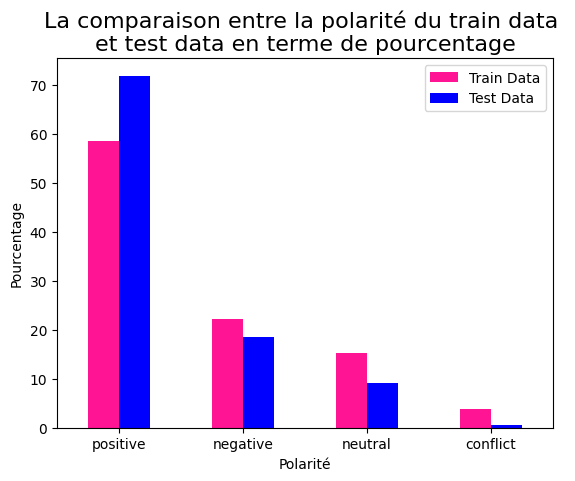

In [39]:
## Comparaison entre la polarité de données d'entrainement et celle de données de test en terme de pourcentage
df_combined.plot(kind='bar', color=colors)
plt.title("La comparaison entre la polarité du train data \net test data en terme de pourcentage", fontsize=16)
plt.xlabel('Polarité')
plt.ylabel('Pourcentage')
plt.xticks(rotation=0)
plt.legend(['Train Data', 'Test Data'])
plt.show()

In [ ]:
################################
#### Modèle d'apprentissage ####
################################

In [55]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import joblib

# Load the training and test datasets
df_train = pd.read_csv("df_train_resto.csv")
df_test = pd.read_csv("df_test_resto.csv")

# Preprocessing
# Assuming the 'phrase' column contains the text data
# Here, we'll use a simple bag-of-words representation
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(df_train['phrase'])
X_test = vectorizer.transform(df_test['phrase'])

# Target variable
y_train = df_train['polarity']
y_test = df_test['polarity']

# Model training
model = LogisticRegression(max_iter=1000)  
model.fit(X_train, y_train)  

# Évaluation du modèle
y_pred = model.predict(X_test)  # Predict polarity for test data
accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
print("Accuracy:", accuracy)

# Résultat de prédiction
results_df = pd.DataFrame({
    'Phrase': df_test['phrase'],
    'Polarité réelle': df_test['polarity'],
    'Polarité prédite': y_pred
})
print(results_df)

# Save the trained model to a file
joblib.dump(model, 'logistic_regression_model.pkl')

Accuracy: 0.8952380952380953
                                                Phrase Polarité réelle  \
0    All the appetizers and salads were fabulous, t...        positive   
1    All the appetizers and salads were fabulous, t...        positive   
2    All the appetizers and salads were fabulous, t...        positive   
3    All the appetizers and salads were fabulous, t...        positive   
4    All the appetizers and salads were fabulous, t...        positive   
..                                                 ...             ...   
205  The dishes offered were unique, very tasty and...        positive   
206                    Went there for an office lunch.         neutral   
207                    Went there for an office lunch.         neutral   
208  We've only eaten in the restaurant once, but w...         neutral   
209  We've only eaten in the restaurant once, but w...         neutral   

    Polarité prédite  
0           positive  
1           positive  
2           p

['logistic_regression_model.pkl']

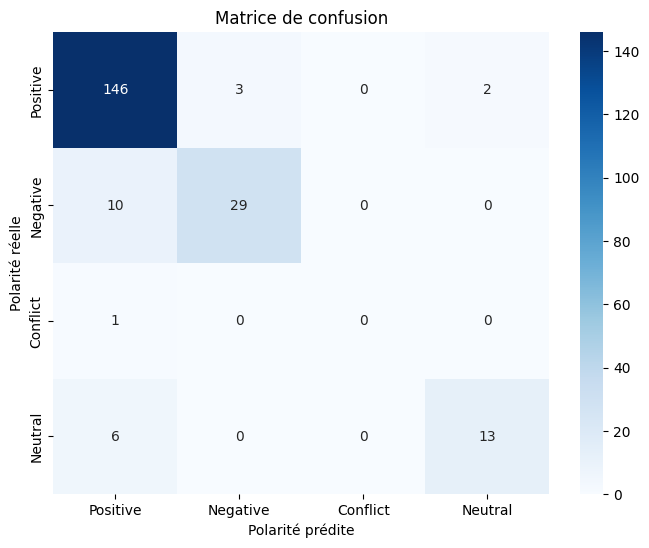

In [47]:
### Matrice de confusion du résultat précédent ###
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred, labels=['positive', 'negative', 'conflict', 'neutral'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Positive', 'Negative', 'Conflict', 'Neutral'], 
            yticklabels=['Positive', 'Negative', 'Conflict', 'Neutral'])
plt.xlabel('Polarité prédite')
plt.ylabel('Polarité réelle')
plt.title('Matrice de confusion')
plt.show()

In [51]:
# M&triques de performance
precision_positive = conf_matrix[0, 0] / sum(conf_matrix[:, 0])
precision_negative = conf_matrix[1, 1] / sum(conf_matrix[:, 1])
precision_conflict = conf_matrix[2, 2] / sum(conf_matrix[:, 2]) if sum(conf_matrix[:, 2]) != 0 else 0
precision_neutral = conf_matrix[3, 3] / sum(conf_matrix[:, 3])

recall_positive = conf_matrix[0, 0] / sum(conf_matrix[0, :])
recall_negative = conf_matrix[1, 1] / sum(conf_matrix[1, :])
recall_conflict = conf_matrix[2, 2] / sum(conf_matrix[2, :]) if sum(conf_matrix[2, :]) != 0 else 0
recall_neutral = conf_matrix[3, 3] / sum(conf_matrix[3, :])

f1_score_positive = 2 * (precision_positive * recall_positive) / (precision_positive + recall_positive) if (precision_positive + recall_positive) != 0 else 0
f1_score_negative = 2 * (precision_negative * recall_negative) / (precision_negative + recall_negative) if (precision_negative + recall_negative) != 0 else 0
f1_score_conflict = 2 * (precision_conflict * recall_conflict) / (precision_conflict + recall_conflict) if (precision_conflict + recall_conflict) != 0 else 0
f1_score_neutral = 2 * (precision_neutral * recall_neutral) / (precision_neutral + recall_neutral)

# Create a dataframe to store the metrics
metrics_df = pd.DataFrame({
    'Class': ['Positive', 'Negative', 'Conflict', 'Neutral'],
    'Precision': [precision_positive, precision_negative, precision_conflict, precision_neutral],
    'Recall': [recall_positive, recall_negative, recall_conflict, recall_neutral],
    'F1-score': [f1_score_positive, f1_score_negative, f1_score_conflict, f1_score_neutral]
})

print(metrics_df)

      Class  Precision    Recall  F1-score
0  Positive   0.895706  0.966887  0.929936
1  Negative   0.906250  0.743590  0.816901
2  Conflict   0.000000  0.000000  0.000000
3   Neutral   0.866667  0.684211  0.764706


In [ ]:
##########################################
### Travail avec les nouvelles données ###
##########################################

In [53]:
import xml.etree.ElementTree as ET
import pandas as pd

# Parse XML file
tree = ET.parse("Restaurants_Test_NoLabels.xml")
root = tree.getroot()

data = []
for sentence in root.findall("sentence"):
    sentence_id = sentence.get("id")
    text = sentence.find("text").text

    # Find all aspectTerm elements in the sentence
    aspect_terms = sentence.findall("aspectTerms/aspectTerm")
    aspect_term_data = []
    for aspect_term in aspect_terms:
        term = aspect_term.get("term")
        polarity = aspect_term.get("polarity")
        from_index = aspect_term.get("from")
        to_index = aspect_term.get("to")
        aspect_term_data.append((term, polarity, from_index, to_index))

    # Find all aspectCategory elements in the sentence
    aspect_categories = sentence.findall("aspectCategories/aspectCategory")
    aspect_category_data = []
    for aspect_category in aspect_categories:
        category = aspect_category.get("category")
        polarity = aspect_category.get("polarity")
        aspect_category_data.append((category, polarity))

    # Append the data for this sentence to the list
    data.append((sentence_id, text, aspect_term_data, aspect_category_data))

# Convert the data to a pandas DataFrame
columns = ["sentence_id", "phrase", "aspect_terms", "aspect_categories"]
df_noLabel = pd.DataFrame(data, columns=columns)

df_noLabel.head(7)

,sentence_id,phrase,aspect_terms,aspect_categories
0,813,"All the appetizers and salads were fabulous, t...","[(appetizers, , 8, 18), (salads, , 23, 29), (s...","[(food, )]"
1,1579,And really large portions.,"[(portions, , 17, 25)]","[(food, )]"
2,2707,Go inside and you won't want to leave.,[],"[(anecdotes/miscellaneous, )]"
3,3126,Save yourself the time and trouble and skip th...,[],"[(anecdotes/miscellaneous, )]"
4,2882,The sweet lassi was excellent as was the lamb ...,"[(sweet lassi, , 4, 15), (lamb chettinad, , 41...","[(food, )]"
5,1609,Service was quick.,"[(Service, , 0, 7)]","[(service, )]"
6,3018,"Oh, don't even let me start with how expensive...","[(bills, , 51, 56)]","[(price, )]"


In [59]:
# Prétraitement les données textuelles
X_new = vectorizer.transform(df_noLabel['phrase'])

# Charger le modèle entraîné
model = joblib.load('logistic_regression_model.pkl')

# Prédire la polarité des nouvelles données
predictions = model.predict(X_new)

# Ajouter les prédictions au DataFrame
df_noLabel['Polarité prédite'] = predictions

# Résultat de prédiction
print(df_noLabel[['phrase', 'predicted_polarity']])

                                               phrase predicted_polarity
0   All the appetizers and salads were fabulous, t...           positive
1                          And really large portions.           positive
2              Go inside and you won't want to leave.           positive
3   Save yourself the time and trouble and skip th...           negative
4   The sweet lassi was excellent as was the lamb ...           positive
..                                                ...                ...
95  After dinner, take your date to the HUGE dance...           positive
96  The server was really cool and served us our f...           positive
97  The dishes offered were unique, very tasty and...           positive
98                    Went there for an office lunch.            neutral
99  We've only eaten in the restaurant once, but w...            neutral

[100 rows x 2 columns]
